# Opravene veci

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
import matplotlib
import statistics
import sklearn

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

train = pd.read_csv("17/train.csv", sep=',', header=None)
test = pd.read_csv("17/test.csv", sep=',', header=None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## Transformacie na trenovacej aj testovacej vzorke

In [2]:
train = train.rename(columns=train.iloc[0]).drop(train.index[0]) #zbavenie sa prveho riadku dat a premena na nazvy stlpcov
test = test.rename(columns=test.iloc[0]).drop(test.index[0])

In [3]:
import json

def medical_info_transform(x):
    lst = []
    for a in x:
        a = a.replace("'",'"')
        record = json.loads(a)
        lst.append(record)
    df = pd.DataFrame(lst)
    return df

train = pd.concat([train, medical_info_transform(train['medical_info'])], axis=1) #rozlozenie json medical_info
test = pd.concat([test, medical_info_transform(test['medical_info'])], axis=1) #rozlozenie json medical_info


Odstranime nepotrebne stlpce

In [4]:
train = train.iloc[1:]
train = train.drop(train.columns[[0]], axis=1)
del train['TBG']
del train['TBG measured']
del train['medical_info']
train[['class','class_id']] = train['class'].str.split('|',expand=True) # class triedu rozdelime na dve
train.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,SVHC,negative.,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,t,t,f,f,f,f,f,f,f,f,232
2,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,SVI,negative.,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,t,t,f,f,f,f,f,f,f,t,3255
3,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,SVI,negative.,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,t,t,f,f,f,f,f,f,f,f,322
4,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,SVHC,negative.,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,t,t,f,f,F,f,f,f,f,f,2462
5,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,other,negative.,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,t,t,f,f,F,f,f,f,f,f,3047


In [5]:
test = test.iloc[1:]
test = test.drop(test.columns[[0]], axis=1)
del test['TBG']
del test['TBG measured']
del test['medical_info']
test[['class','class_id']] = test['class'].str.split('|',expand=True) # class triedu rozdelime na dve
test.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,24,M,f,f,f,f,f,f,3.3,t,1.2,t,70.0,0.87,t,80,SVI,negative.,Private,143766,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,1993/08/27,t,t,f,f,f,f,f,f,f,f,177
2,69,F,f,f,f,f,f,f,1.1,t,1.9,t,135.0,0.96,t,141,SVI,negative.,Private,57637,HS-grad,9,Divorced,Other-service,Not_in_family,White,0,0,32,United-States,1949-03-07 00 00 00,t,t,f,f,f,f,f,f,f,f,3191
3,37,M,f,f,f,f,f,f,2.6,t,2.3,t,68.0,0.94,t,72,other,negative.,Private,244268,11th,7,Married-civ-spouse,Craft-repair,Husband,White,0,1672,48,United-States,1980-09-12,t,t,f,f,f,f,f,f,f,f,3013
4,46,M,f,f,f,f,f,f,0.25,t,2.0,t,112.0,1.01,t,111,SVI,negative.,Private,606347,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Black,0,0,40,United-States,15/07/1971,t,t,f,f,f,f,f,f,f,f,701
5,29,F,f,f,f,f,f,f,1.6,t,2.6,t,89.0,0.98,t,91,other,negative.,Self-emp-inc,342510,Bachelors,13,Married-civ-spouse,Farming-fishing,Wife,White,0,0,60,United-States,1988-08-17,f,t,f,f,f,f,f,f,f,f,541


**Oprava AGE**

In [6]:
def oprav_age(a):
    a = float(a)    
    a = abs(a)
    a = a%100
    
    if np.isnan(a):
        a = 1000
    
    a = int(a)
    return a

In [7]:
def vymaz_riadok_kde_nie_je_vek(df,column):
    for i,a in df[column].iteritems():
        if a == 1000:
            df = df[df[column]!=1000]
    return df
            

In [8]:
train['age'] = train['age'].map(lambda x: oprav_age(x))
test['age'] = test['age'].map(lambda x: oprav_age(x))

In [9]:
train = vymaz_riadok_kde_nie_je_vek(train,'age') #rozhodli sme sa data s chybajucim vekom odstranit
test = vymaz_riadok_kde_nie_je_vek(test,'age') #rozhodli sme sa data s chybajucim vekom odstranit

**Oprava kategorickych hodnot**

In [10]:
class Transform(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

Oprava **referral source**

In [11]:
ppl = Pipeline([
              ('name1', Transform('referral source', 'SVHC', 'svhc')),
              ('name2', Transform('referral source', 'SVI', 'svi')),
              ('name3', Transform('referral source', 'Other', 'other')),
              ('name4', Transform('referral source', 'sVHC', 'svhc')),
              ('name5', Transform('referral source', 'sVI', 'svi')),
              ('name6', Transform('referral source', 'STMW', 'stmw')),
              ('name7', Transform('referral source', 'SVHD', 'svhd')),
              ('name8', Transform('referral source', 'sTMW', 'stmw')),
              ('name9', Transform('referral source', 'sVHD', 'svhd')),
      ])

model = ppl.fit(train)
train = model.transform(train)
test = model.transform(test)

Oprava **relationship** - odstranenie zaciatocnych bielych znakov a zjednotenie hodnot

In [12]:
def strip(x):
    return x.strip()

train['relationship'] = train['relationship'].map(lambda x: strip(x))
test['relationship'] = test['relationship'].map(lambda x: strip(x))

line = Pipeline([
              ('r1', Transform('relationship', 'Not_in_family', 'Not-in-family')),
              ('r2', Transform('relationship', 'Own_child', 'Own-child')),
              ('r3', Transform('relationship', 'Other_relative', 'Other-relative')),
      ])

model = line.fit(train)
train = model.transform(train)
test = model.transform(test)


Oprava **workclass** - odstranenie zaciatocnych bielych znakov

In [13]:
train['workclass'] = train['workclass'].map(lambda x: strip(x))
test['workclass'] = test['workclass'].map(lambda x: strip(x))

Oprava **race** - odstranenie zaciatocnych bielych znakov

In [14]:
train['race'] = train['race'].map(lambda x: strip(x))
test['race'] = test['race'].map(lambda x: strip(x))


Oprava **native country** - odstranenie zaciatocnych bielych znakov

In [15]:
train['native-country'] = train['native-country'].map(lambda x: strip(x))
test['native-country'] = test['native-country'].map(lambda x: strip(x))

Oprava **date of birth** - zjednotenie formatov datumov

In [16]:
from datetime import date
import datetime

def guess_date(string):
    for fmt in ["%Y/%m/%d", "%Y%m%d", "%y-%m-%d", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H %M %S", "%d/%m/%Y"]:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)
    
def string_is_nan(x):
    if str(x) != 'nan':
        return True
    else:
        return False
    

In [17]:
train['date_of_birth'] = train['date_of_birth'].map(lambda x: guess_date(str(x)) if string_is_nan(x) else x)
test['date_of_birth'] = test['date_of_birth'].map(lambda x: guess_date(str(x)) if string_is_nan(x) else x)
    

Oprava **on thyroxine** - zjednotenie formatov

In [18]:
line = Pipeline([
              ('ot1', Transform('on thyroxine', 'F', 'f')),
              ('ot2', Transform('on thyroxine', 'T', 't')),
              ('ot3', Transform('on thyroxine', 'FALSE', 'f')),
              ('ot4', Transform('on thyroxine', 'TRUE', 't')),
      ])

model = line.fit(train)
train = model.transform(train)
test = model.transform(test)

## Chybajuce a vychylene hodnoty

Transformacia numerickych hodnot pri TSH, TT4, T4U, FTI a T3 na float. Predtym nez pouzijeme mapovaciu funkciu, musime doplnit chybajuce data

In [19]:
def check_if_number(inputString):
    return any(char.replace('.','',1).isdigit() for char in str(inputString))

def map_to_float(x):
    if(check_if_number(x)):
        return float(x)
    elif(x=='?'):
        return float('NaN')

**TSH**

In [20]:
train['TSH'] = train['TSH'].map(lambda x: map_to_float(x))
test['TSH'] = test['TSH'].map(lambda x: map_to_float(x))

In [21]:
import statistics
median_train = statistics.median(train['TSH'].value_counts())
median_test = statistics.median(test['TSH'].value_counts())
train['TSH'] = train['TSH'].fillna(median_train)
test['TSH'] = test['TSH'].fillna(median_train)

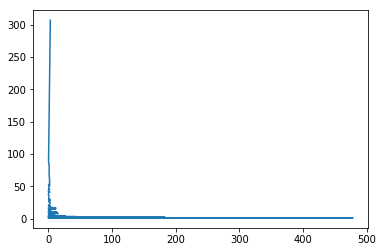

In [22]:
train['TSH'].value_counts().plot(kind='line')

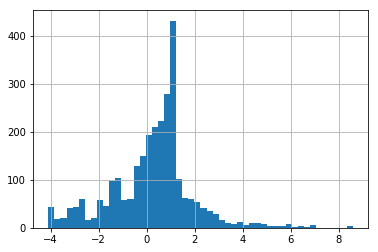

In [23]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TSH'])
pom = pd.Series(transformed).hist(bins=50)

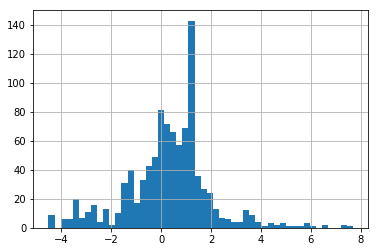

In [24]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TSH'])
pom = pd.Series(transformed).hist(bins=50)

**TT4**

In [25]:
train['TT4'] = train['TT4'].map(lambda x: map_to_float(x))
test['TT4'] = test['TT4'].map(lambda x: map_to_float(x))

In [26]:
from fancyimpute import KNN 
train['TT4'] = KNN(k=10).complete(train['TT4'].reshape(-1,1))
test['TT4'] = KNN(k=10).complete(test['TT4'].reshape(-1,1))

C:\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Imputing row 1/2799 with 0 missing, elapsed time: 1.017
Imputing row 101/2799 with 0 missing, elapsed time: 1.017
Imputing row 201/2799 with 0 missing, elapsed time: 1.018
Imputing row 301/2799 with 0 missing, elapsed time: 1.019
Imputing row 401/2799 with 1 missing, elapsed time: 1.020
Imputing row 501/2799 with 0 missing, elapsed time: 1.020
Imputing row 601/2799 with 0 missing, elapsed time: 1.021
Imputing row 701/2799 with 0 missing, elapsed time: 1.021
Imputing row 801/2799 with 0 missing, elapsed time: 1.022
Imputing row 901/2799 with 0 missing, elapsed time: 1.023
Imputing row 1001/2799 with 0 missing, elapsed time: 1.023
Imputing row 1101/2799 with 0 missing, elapsed time: 1.024
Imputing row 1201/2799 with 0 missing, elapsed time: 1.025
Imputing row 1301/2799 with 0 missing, elapsed time: 1.025
Imputing row 1401/2799 with 0 missing, elapsed time: 1.026
Imputing row 1501/2799 with 0 missing, elapsed time: 1.027
Imputing row 1601/2799 with 0 missing, elapsed time: 1.027
Imputing 

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
train['TT4'] = train['TT4'].ravel()
test['TT4'] = test['TT4'].ravel()

In [28]:
train['TT4'] = pd.Series(train['TT4'])
test['TT4'] = pd.Series(test['TT4'])

In [29]:
train['TT4'] = train['TT4'].map(lambda x: train['TT4'].mean() if x == 0.0 else x)
test['TT4'] = test['TT4'].map(lambda x: test['TT4'].mean() if x == 0.0 else x)

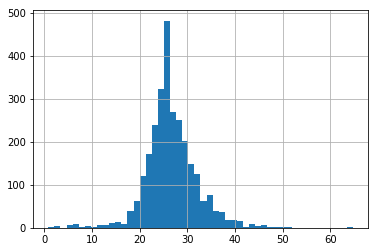

In [30]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TT4'])
pom = pd.Series(transformed).hist(bins=50)

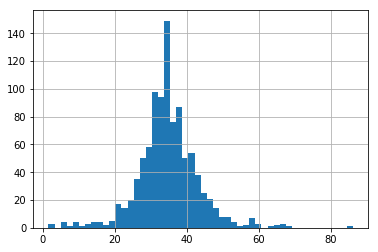

In [31]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TT4'])
pom = pd.Series(transformed).hist(bins=50)

**FTI**

In [32]:
train['FTI'] = train['FTI'].map(lambda x: map_to_float(x))
test['FTI'] = test['FTI'].map(lambda x: map_to_float(x))

In [33]:
from fancyimpute import KNN 
train['FTI'] = KNN(k=10).complete(train['FTI'].reshape(-1,1))
test['FTI'] = KNN(k=10).complete(test['FTI'].reshape(-1,1))

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Imputing row 1/2799 with 0 missing, elapsed time: 0.995
Imputing row 101/2799 with 0 missing, elapsed time: 0.996
Imputing row 201/2799 with 0 missing, elapsed time: 0.996
Imputing row 301/2799 with 0 missing, elapsed time: 0.997
Imputing row 401/2799 with 1 missing, elapsed time: 0.997
Imputing row 501/2799 with 0 missing, elapsed time: 0.998
Imputing row 601/2799 with 0 missing, elapsed time: 0.998
Imputing row 701/2799 with 0 missing, elapsed time: 0.998
Imputing row 801/2799 with 0 missing, elapsed time: 0.999
Imputing row 901/2799 with 0 missing, elapsed time: 0.999
Imputing row 1001/2799 with 0 missing, elapsed time: 1.000
Imputing row 1101/2799 with 0 missing, elapsed time: 1.000
Imputing row 1201/2799 with 0 missing, elapsed time: 1.000
Imputing row 1301/2799 with 0 missing, elapsed time: 1.001
Imputing row 1401/2799 with 0 missing, elapsed time: 1.001
Imputing row 1501/2799 with 0 missing, elapsed time: 1.001
Imputing row 1601/2799 with 0 missing, elapsed time: 1.002
Imputing 

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
train['FTI'] = train['FTI'].ravel()
test['FTI'] = test['FTI'].ravel()
train['FTI'] = pd.Series(train['FTI'])
test['FTI'] = pd.Series(test['FTI'])

In [35]:
train['FTI'] = train['FTI'].map(lambda x: train['FTI'].mean() if x == 0.0 else x)
test['FTI'] = test['FTI'].map(lambda x: test['FTI'].mean() if x == 0.0 else x)

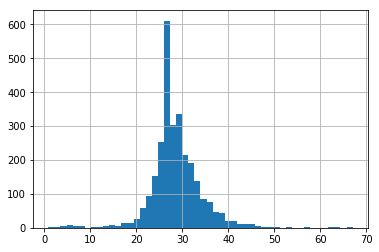

In [36]:
from scipy.stats import boxcox
transformed, att = boxcox(train['FTI'])
pom = pd.Series(transformed).hist(bins=50)

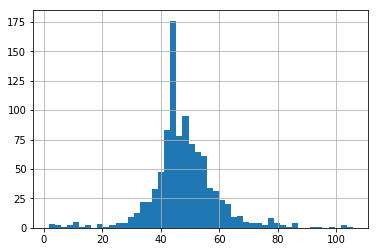

In [37]:
from scipy.stats import boxcox
transformed, att = boxcox(test['FTI'])
pom = pd.Series(transformed).hist(bins=50)

**T4U**

In [38]:
train['T4U'] = train['T4U'].map(lambda x: map_to_float(x))
test['T4U'] = test['T4U'].map(lambda x: map_to_float(x))

from fancyimpute import KNN 
train['T4U'] = KNN(k=10).complete(train['T4U'].reshape(-1,1))
test['T4U'] = KNN(k=10).complete(test['T4U'].reshape(-1,1))

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Imputing row 1/2799 with 0 missing, elapsed time: 0.980
Imputing row 101/2799 with 0 missing, elapsed time: 0.981
Imputing row 201/2799 with 0 missing, elapsed time: 0.982
Imputing row 301/2799 with 0 missing, elapsed time: 0.983
Imputing row 401/2799 with 1 missing, elapsed time: 0.983
Imputing row 501/2799 with 0 missing, elapsed time: 0.984
Imputing row 601/2799 with 0 missing, elapsed time: 0.984
Imputing row 701/2799 with 0 missing, elapsed time: 0.984
Imputing row 801/2799 with 0 missing, elapsed time: 0.985
Imputing row 901/2799 with 0 missing, elapsed time: 0.985
Imputing row 1001/2799 with 0 missing, elapsed time: 0.986
Imputing row 1101/2799 with 0 missing, elapsed time: 0.986
Imputing row 1201/2799 with 0 missing, elapsed time: 0.986
Imputing row 1301/2799 with 0 missing, elapsed time: 0.987
Imputing row 1401/2799 with 0 missing, elapsed time: 0.987
Imputing row 1501/2799 with 0 missing, elapsed time: 0.988
Imputing row 1601/2799 with 0 missing, elapsed time: 0.988
Imputing 

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [39]:
train['T4U'] = train['T4U'].ravel()
test['T4U'] = test['T4U'].ravel()
train['T4U'] = pd.Series(train['T4U'])
test['T4U'] = pd.Series(test['T4U'])

train['T4U'] = train['T4U'].map(lambda x: train['T4U'].mean() if x == 0.0 else x)
test['T4U'] = test['T4U'].map(lambda x: test['T4U'].mean() if x == 0.0 else x)

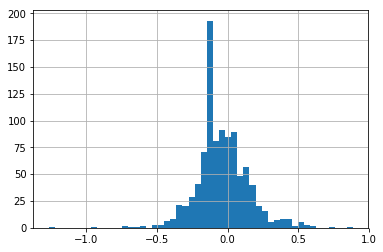

In [40]:
from scipy.stats import boxcox
transformed, att = boxcox(test['T4U'])
pom = pd.Series(transformed).hist(bins=50)

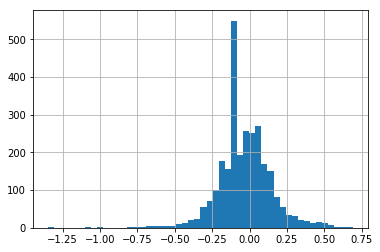

In [41]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T4U'])
pom = pd.Series(transformed).hist(bins=50)

**T3**

In [42]:
train['T3'] = train['T3'].map(lambda x: map_to_float(x))
test['T3'] = test['T3'].map(lambda x: map_to_float(x))

from fancyimpute import KNN 
train['T3'] = KNN(k=10).complete(train['T3'].reshape(-1,1))
test['T3'] = KNN(k=10).complete(test['T3'].reshape(-1,1))

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Imputing row 1/2799 with 0 missing, elapsed time: 0.958
Imputing row 101/2799 with 0 missing, elapsed time: 0.959
Imputing row 201/2799 with 0 missing, elapsed time: 0.959
Imputing row 301/2799 with 0 missing, elapsed time: 0.960
Imputing row 401/2799 with 1 missing, elapsed time: 0.960
Imputing row 501/2799 with 0 missing, elapsed time: 0.961
Imputing row 601/2799 with 0 missing, elapsed time: 0.962
Imputing row 701/2799 with 0 missing, elapsed time: 0.963
Imputing row 801/2799 with 0 missing, elapsed time: 0.964
Imputing row 901/2799 with 1 missing, elapsed time: 0.964
Imputing row 1001/2799 with 0 missing, elapsed time: 0.965
Imputing row 1101/2799 with 0 missing, elapsed time: 0.965
Imputing row 1201/2799 with 0 missing, elapsed time: 0.966
Imputing row 1301/2799 with 0 missing, elapsed time: 0.966
Imputing row 1401/2799 with 0 missing, elapsed time: 0.967
Imputing row 1501/2799 with 1 missing, elapsed time: 0.968
Imputing row 1601/2799 with 0 missing, elapsed time: 0.969
Imputing 

C:\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [43]:
train['T3'] = train['T3'].ravel()
test['T3'] = test['T3'].ravel()
train['T3'] = pd.Series(train['T3'])
test['T3'] = pd.Series(test['T3'])

train['T3'] = train['T3'].map(lambda x: train['T3'].mean() if x == 0.0 else x)
test['T3'] = test['T3'].map(lambda x: test['T3'].mean() if x == 0.0 else x)

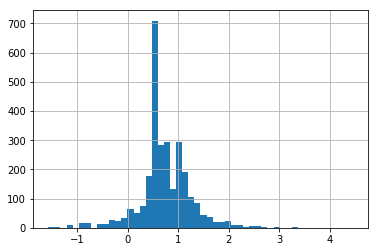

In [44]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T3'])
pom = pd.Series(transformed).hist(bins=50)

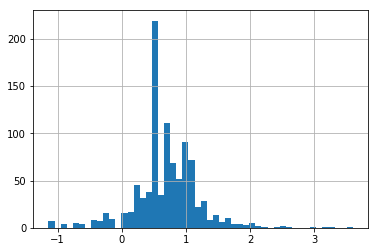

In [45]:
from scipy.stats import boxcox
transformed, att = boxcox(test['T3'])
pom = pd.Series(transformed).hist(bins=50)

In [46]:
train['fnlwgt']  = train['fnlwgt'].map(lambda x: float(x))
test['fnlwgt']  = test['fnlwgt'].map(lambda x: float(x))

### Korelacie na trenovacich datach

In [47]:
#train['class'] = train['class'].map(lambda x: 1 if(x=='sick.') else 0)
#test['class'] = test['class'].map(lambda x: 1 if(x=='sick.') else 0)

In [48]:
df = train[['TT4', 'T4U', 'FTI', 'T3', 'TSH','fnlwgt']]
df_class = train['class']

In [78]:
df.corr()
pd.set_option('display.max_rows', 2800)
ex = train.isin(['?', 'nan', 'Nan', '??'])
train.isnull().any().any()

True

KeyError: 'class'

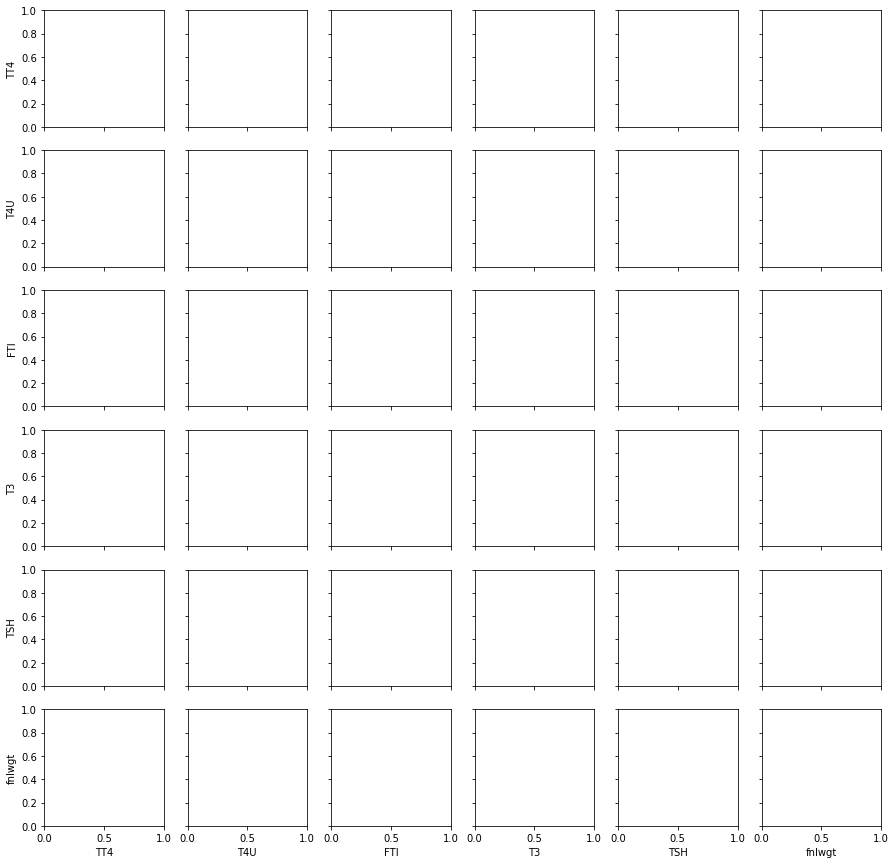

In [50]:
sb.pairplot(df, hue="class")

In [58]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()

from sklearn.model_selection import train_test_split
trains, test, train_labels, test_labels = train_test_split(df,
                                                          df_class,
                                                          test_size=0.33,
                                                          random_state=42)

1089    negative.
773     negative.
2618    negative.
1193    negative.
1653    negative.
1615    negative.
2213    negative.
2020    negative.
1396    negative.
1115    negative.
          ...    
757     negative.
2060    negative.
1862    negative.
1975    negative.
119     negative.
1959    negative.
2477    negative.
282         sick.
2455    negative.
1001    negative.
Name: class, Length: 924, dtype: object

In [69]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(max_depth=9, min_samples_leaf=3)
model = cls.fit(trains, train_labels)

In [70]:
model.score(trains, train_labels)

0.9888

In [83]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(test)
train_preds

array(['negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'sick.',
       'negative.', 'negative.', 'sick.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'sick.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'sick.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       'negative.', 'negative.', 'negative.', 'negative.', 'negative.',
       '

In [90]:
model.score(test, test_labels)
x = pd.Series(train_preds)
x.value_counts()

negative.    878
sick.         46
dtype: int64

In [ ]:
preds = model.predict(test)
accuracy_score(test_labels, preds)

In [102]:
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher

encoder = ce.OneHotEncoder() 
#titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
#titanic_y = titanic.dropna().reindex(columns=['Survived'])
train_X = train
encoder.fit(train_X, train_X.TT4)
titanic_categorical = encoder.transform(train_X)
titanic_categorical.head()

KeyboardInterrupt: 

nejake pokusy o trenovanie a naznaky transformacie atributov, neviem ktory pristup je lepsie pouzit ale skor sa mi paci ten OneHot ako Hasher, ale strasne dlho to trva no ten hasher neviem ako funguje tak mozno bude ten onehot jedina cesta